In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
resnet18_anova = pd.read_excel('./result/train_info_resnet18_part_detrend_plr_stft_bin_win_anova.xlsx')
googlenet_anova = pd.read_excel('./result/train_info_googlenet_part_detrend_plr_stft_bin_win_anova.xlsx')
group_anova = pd.read_excel('./result/train_info_group_part_detrend_plr_stft_bin_win_anova.xlsx')

resnet18_fi = pd.read_excel('./result/train_info_resnet18_part_detrend_plr_stft_bin_win_fi.xlsx')
googlenet_fi= pd.read_excel('./result/train_info_googlenet_part_detrend_plr_stft_bin_win_fi.xlsx')
group_fi = pd.read_excel('./result/train_info_group_part_detrend_plr_stft_bin_win_fi.xlsx')

resnet18_lcc = pd.read_excel('./result/train_info_resnet18_part_detrend_plr_stft_bin_win_lcc.xlsx')
googlenet_lcc  = pd.read_excel('./result/train_info_googlenet_part_detrend_plr_stft_bin_win_lcc.xlsx')
group_lcc  = pd.read_excel('./result/train_info_group_part_detrend_plr_stft_bin_win_lcc.xlsx')

resnet18_pca = pd.read_excel('./result/train_info_resnet18_part_detrend_plr_stft_bin_win_pca.xlsx')
googlenet_pca  = pd.read_excel('./result/train_info_googlenet_part_detrend_plr_stft_bin_win_pca.xlsx')
group_pca  = pd.read_excel('./result/train_info_group_part_detrend_plr_stft_bin_win_pca.xlsx')

resnet18_nan = pd.read_excel('./result/train_info_resnet18_part_detrend_plr_stft_bin_win.xlsx')
googlenet_nan = pd.read_excel('./result/train_info_googlenet_part_detrend_plr_stft_bin_win.xlsx')
group_nan = pd.read_excel('./result/train_info_group_part_detrend_plr_stft_bin_win.xlsx')

In [5]:
dataframes = [  
    resnet18_anova, googlenet_anova, group_anova,  
    resnet18_fi, googlenet_fi, group_fi,  
    resnet18_lcc, googlenet_lcc, group_lcc,
    resnet18_pca, googlenet_pca, group_pca,
    resnet18_nan, googlenet_nan, group_nan  
] 

def convert_to_percentage(df_list, columns):  
    for df in df_list:  
        for column in columns:  
            if column in df.columns:
                df[column] = df[column] * 100  
  
percentage_columns = ['test_acc', 'precision', 'recall']
convert_to_percentage(dataframes, percentage_columns)

In [6]:
networks_anova = {  
    'ResNet-18': resnet18_anova,  
    'GoogLeNet': googlenet_anova,  
}  
networks_fi = {  
    'ResNet-18': resnet18_fi,  
    'GoogLeNet': googlenet_fi,  
}  
networks_lcc = {  
    'ResNet-18': resnet18_lcc,  
    'GoogLeNet': googlenet_lcc,  
}
networks_pca = {  
    'ResNet-18': resnet18_pca,  
    'GoogLeNet': googlenet_pca,  
}
networks_nan = {  
    'ResNet-18': resnet18_nan, 
    'GoogLeNet': googlenet_nan,  
}  
  
situations = [('N/A', networks_nan), ('ANOVA', networks_anova), ('Feat. Imp.', networks_fi), ('LCC', networks_lcc), ('PCA', networks_pca)]  

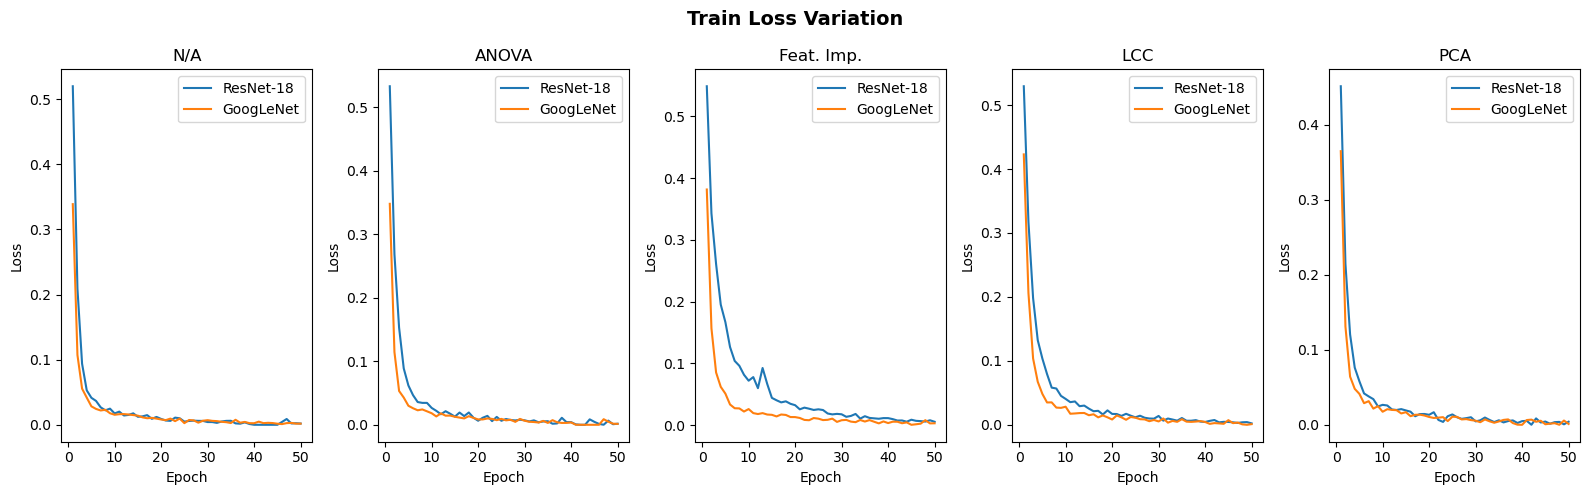

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(16, 5))  
fig.suptitle('Train Loss Variation', fontweight='bold', size=14)
for i, (situation_name, networks) in enumerate(situations):  
    for network_name, network_data in networks.items():  
        axs[i].plot(network_data['epoch'], network_data['train_loss'], label=network_name)  
      
    axs[i].set_xlabel('Epoch')  
    axs[i].set_ylabel('Loss')  
    axs[i].set_title(f'{situation_name}')  
    axs[i].legend()  
  
plt.tight_layout()
plt.show()

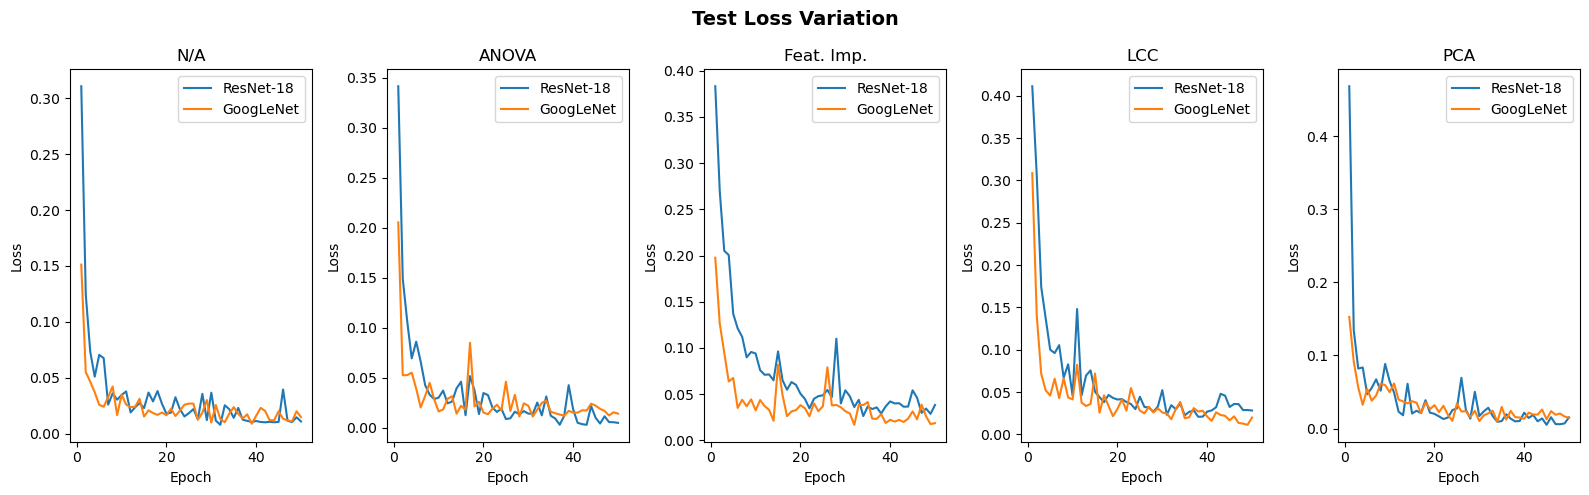

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(16, 5))  
fig.suptitle('Test Loss Variation', fontweight='bold', size=14)
for i, (situation_name, networks) in enumerate(situations):  
    for network_name, network_data in networks.items():  
        axs[i].plot(network_data['epoch'], network_data['test_loss'], label=network_name)  
      
    axs[i].set_xlabel('Epoch')  
    axs[i].set_ylabel('Loss')  
    axs[i].set_title(f'{situation_name}')  
    axs[i].legend()  
  
plt.tight_layout()
plt.show()

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def extract_best_performance(df):  
    best_performance = df[df['test_acc'] == df['test_acc'].max()]  
    return {  
        'Precision (%)': best_performance['precision'].values[0],  
        'Recall (%)': best_performance['recall'].values[0],  
        'F1 Score': best_performance['f1'].values[0],  
        'Accuracy (%)': best_performance['test_acc'].values[0],  
        'Total Training Time (Min)': df['time'].sum() / 60  
    }  
  
results_df = pd.DataFrame(columns=['Feature Reduction Method', 'Model', 'Precision (%)', 'Recall (%)',   
                                   'F1 Score', 'Accuracy (%)', 'Total Training Time (Min)'])  
  
preprocessing_methods = {'N/A': [networks_nan, group_nan], 'ANOVA': [networks_anova, group_anova], 
                         'Feat. Imp.': [networks_fi, group_fi], 'LCC': [networks_lcc, group_lcc], 'PCA': [networks_pca, group_pca]}  
  
for preprocessing, models_list in preprocessing_methods.items():  
    for modeltype in models_list:
        if type(modeltype) == dict:
            for model_name, model_data in modeltype.items():  
                best_perf = extract_best_performance(model_data)  
                results_df = results_df._append({    
                    'Feature Reduction Method': preprocessing,   
                    'Model': model_name,
                    'Precision (%)': best_perf['Precision (%)'],  
                    'Recall (%)': best_perf['Recall (%)'],  
                    'F1 Score': best_perf['F1 Score'],  
                    'Accuracy (%)': best_perf['Accuracy (%)'],  
                    'Total Training Time (Min)': best_perf['Total Training Time (Min)']  
                }, ignore_index=True) 
        else:
            for index, row in modeltype.iterrows():  
                best_perf = {  
                    'Precision (%)': row['precision'],  
                    'Recall (%)': row['recall'],  
                    'F1 Score': row['f1'],  
                    'Accuracy (%)': row['test_acc'],  
                    'Total Training Time (Min)': row['time'] / 60 
                }  
                
                results_df = results_df._append({  
                    'Feature Reduction Method': preprocessing,  
                    'Model': row['model'],  
                    'Precision (%)': best_perf['Precision (%)'],  
                    'Recall (%)': best_perf['Recall (%)'],  
                    'F1 Score': best_perf['F1 Score'],  
                    'Accuracy (%)': best_perf['Accuracy (%)'],  
                    'Total Training Time (Min)': best_perf['Total Training Time (Min)']  
                }, ignore_index=True)  

In [10]:
results_df

,Feature Reduction Method,Model,Precision (%),Recall (%),F1 Score,Accuracy (%),Total Training Time (Min)
0,N/A,ResNet-18,99.703923,99.851742,0.997778,99.777035,48.700687
1,N/A,GoogLeNet,99.888683,99.777613,0.998331,99.832776,60.078203
2,N/A,Decision Tree,93.461396,93.773165,0.936170,93.589744,0.130962
3,N/A,Random Forest,99.258435,99.221646,0.992400,99.238201,0.586715
4,N/A,KNN,99.814815,99.888807,0.998518,99.851356,0.000797
5,N/A,Logistic Regression,79.955374,79.688658,0.798218,79.803047,0.026637
6,N/A,SVM,96.425940,96.997776,0.967110,96.692679,0.150078
7,ANOVA,ResNet-18,99.851852,99.925871,0.998888,99.888517,48.340553
8,ANOVA,GoogLeNet,99.703594,99.740549,0.997221,99.721293,58.840561
9,ANOVA,Decision Tree,94.049401,93.143069,0.935940,93.608324,0.118424


In [11]:
accuracies = results_df[results_df['Feature Reduction Method'] == 'N/A']['Accuracy (%)'].values.tolist()  
anova_accuracies = results_df[results_df['Feature Reduction Method'] == 'ANOVA']['Accuracy (%)'].values.tolist()  
fi_accuracies = results_df[results_df['Feature Reduction Method'] == 'Feat. Imp.']['Accuracy (%)'].values.tolist()  
lcc_accuracies = results_df[results_df['Feature Reduction Method'] == 'LCC']['Accuracy (%)'].values.tolist()  
pca_accuracies = results_df[results_df['Feature Reduction Method'] == 'PCA']['Accuracy (%)'].values.tolist()

results_df_2 = pd.DataFrame({  
    'Model': results_df['Model'].unique(),
    'N/A': accuracies,  
    'ANOVA': anova_accuracies,
    'Feat. Imp.': fi_accuracies,
    'LCC': lcc_accuracies,
    'PCA': pca_accuracies
})  

results_df_2

,Model,N/A,ANOVA,Feat. Imp.,LCC,PCA
0,ResNet-18,99.777035,99.888517,99.349684,99.405425,99.814195
1,GoogLeNet,99.832776,99.721293,99.646971,99.721293,99.777035
2,Decision Tree,93.589744,93.608324,93.180974,92.512077,88.275734
3,Random Forest,99.238201,99.256782,98.848012,98.736529,98.662207
4,KNN,99.851356,99.777035,99.554069,99.572650,99.851356
5,Logistic Regression,79.803047,79.691564,77.313266,77.164623,79.803047
6,SVM,96.692679,96.302490,93.552583,93.478261,96.711260


In [12]:
import scipy.stats as stats

alpha = 0.025

def calculate_z_stat(mean1, mean2, std1, std2, n):
    std_combined = np.sqrt((std1**2 + std2**2) / n)
    z_stat = (mean1 - mean2) / std_combined
    return z_stat

critical_value = stats.norm.ppf(1 - alpha / 2)

def evaluate_hypothesis(z_stat, critical_value):
    if abs(z_stat) > critical_value:
        return "Reject H0"
    else:
        return "Fail to reject H0"

for model in results_df_2['Model']:
    original_acc = results_df_2.loc[results_df_2['Model'] == model, 'N/A'].values[0]
    anova_acc = results_df_2.loc[results_df_2['Model'] == model, 'ANOVA'].values[0]
    feat_imp_acc = results_df_2.loc[results_df_2['Model'] == model, 'Feat. Imp.'].values[0]
    lcc_acc = results_df_2.loc[results_df_2['Model'] == model, 'LCC'].values[0]
    pca_acc = results_df_2.loc[results_df_2['Model'] == model, 'PCA'].values[0]

    # Using the standard deviation of the original as an approximation
    std_original = np.std(results_df_2['N/A'], ddof=1)

    z_stat_original_vs_anova = calculate_z_stat(original_acc, anova_acc, std_original, std_original, 1)
    z_stat_original_vs_feat_imp = calculate_z_stat(original_acc, feat_imp_acc, std_original, std_original, 1)
    z_stat_original_vs_lcc = calculate_z_stat(original_acc, lcc_acc, std_original, std_original, 1)
    z_stat_original_vs_pca = calculate_z_stat(original_acc, pca_acc, std_original, std_original, 1)

    print(f'\nFor model {model}:')
    print(f'Z-statistic (Original vs ANOVA): {z_stat_original_vs_anova}')
    print(f'Critical value (Original vs ANOVA): {critical_value}')
    result_anova = evaluate_hypothesis(z_stat_original_vs_anova, critical_value)
    print(f'Hypothesis test result for ANOVA: {result_anova}')

    print(f'Z-statistic (Original vs Feat. Imp.): {z_stat_original_vs_feat_imp}')
    print(f'Critical value (Original vs Feat. Imp.): {critical_value}')
    result_feat_imp = evaluate_hypothesis(z_stat_original_vs_feat_imp, critical_value)
    print(f'Hypothesis test result for Feat. Imp.: {result_feat_imp}')

    print(f'Z-statistic (Original vs LCC): {z_stat_original_vs_lcc}')
    print(f'Critical value (Original vs LCC): {critical_value}')
    result_lcc = evaluate_hypothesis(z_stat_original_vs_lcc, critical_value)
    print(f'Hypothesis test result for LCC: {result_lcc}')

    print(f'Z-statistic (Original vs PCA): {z_stat_original_vs_pca}')
    print(f'Critical value (Original vs PCA): {critical_value}')
    result_pca = evaluate_hypothesis(z_stat_original_vs_pca, critical_value)
    print(f'Hypothesis test result for PCA: {result_pca}')


For model ResNet-18:
Z-statistic (Original vs ANOVA): -0.01077025143050538
Critical value (Original vs ANOVA): 2.241402727604947
Hypothesis test result for ANOVA: Fail to reject H0
Z-statistic (Original vs Feat. Imp.): 0.04128596381693775
Critical value (Original vs Feat. Imp.): 2.241402727604947
Hypothesis test result for Feat. Imp.: Fail to reject H0
Z-statistic (Original vs LCC): 0.03590083810168369
Critical value (Original vs LCC): 2.241402727604947
Hypothesis test result for LCC: Fail to reject H0
Z-statistic (Original vs PCA): -0.0035900838101689176
Critical value (Original vs PCA): 2.241402727604947
Hypothesis test result for PCA: Fail to reject H0

For model GoogLeNet:
Z-statistic (Original vs ANOVA): 0.01077025143050538
Critical value (Original vs ANOVA): 2.241402727604947
Hypothesis test result for ANOVA: Fail to reject H0
Z-statistic (Original vs Feat. Imp.): 0.017950419050841843
Critical value (Original vs Feat. Imp.): 2.241402727604947
Hypothesis test result for Feat. Imp